<a href="https://colab.research.google.com/github/SunDubey/Projects/blob/master/Axa_Marketing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement :
Develop a classification model based on the target field "received_quote". This represents whether a axa customer took up an offer from the axa campaign and gave a house quote or not.

Buisness Problem : Reduce loss to the company by accurately predicting the  potentail customers who would be willing to give house quote. So that success rate of marketing campaigns could increase resulting in increase of ROI for the insurance company.

 
Suppose i have a company and i want to increase my sales, company in this case they want to decrease loss and increase profit. Now, to decrease loss they want to invest to make marketing offer to those who my model think would subscribe and actually also they subscribed.

Losses can be prevented in two cases :

1).By reducing the number of wrong predictions, cases where my model predicted customer would subscribe but actually he is not willing too. Now marketing offers would go to a wrong person resulting in poor customer targeting and increased losses.


2). By reducing number of cases where my model predicted customer would not subscribe but actually he is willing to subscribe.In this case we will not make a marketing offer to a customer who is willing to subscribe. This is very important point where customer is ready buisness is not reaching to him. Buisness is not only losing opportunity but also losing potential clients.

This is precision recall paradox, as our data is biased towards negative predictions false negative predictions could go up.
We can afford some false positives as conversion rate after the call will still be less. 
We need to be tight on false negatives, as customer want to give offer but company did not make an offer as model predicted wrong.


# A. Attributes Description: <br>

# I. Axa client data:<br>
<a id="Axa_client_data"></a>
1 - **customer_id:** internal customer identification number
 (numeric)<br>
2 - **marital_status:** Marital Status of Customer (categorical)<br>
3 - **years_residency:** How long a customer has resided at their current address (numeric)<br>
4 - **homeowner_type:** (categorical)<br>
5 - **employment_status:** Employment status of Customer (categorical)<br>
6 - **vulnerable:** Indication whether this customer been identified as a
vulnerable cutomer (numeric)<br>
7 - **credit_rating:** AXA's Internal credit rating code of the policyholder. (categorical)<br>
8 - **myaxa_status:** AXA online account status.<br>
9 - **age:** Age of Customer, calculated using customer's DOB at
campaign send date<br>

# II. Related with the last contact of the current campaign:
<a id="last_contact"></a>
10 - **cmp_num:** Number of prior campaigns linked to a customer (numeric) <br>
11 - **send_num:** Number of prior emails sent to a customer (numeric)<br>
12 - **open_num:** Number of prior emails opened by a customer (numeric)<br>
13 - **click_num:** Number of prior emails clicked by a customer.(numeric)<br>
14 - **atpt_num:** Number of attempted calls made to a customer prior to campaign.(numeric)<br>
15 - **axis_cmp_num:** Number of AXIS campaigns sent to a customer (numeric)<br>
16 - **claim_num:** Number of claims linked to a customer (numeric)<br>
17 - **house_quote_num:**  Number of house quotes made by a customer prior to campaign. (numeric)<br>
18 - **tmsc_last_housequote:** Years since last house quote carried out by the customer prior to campaign send date (numeric)<br>
19 - **nonhouse_quote_num:** Number of non-house (motor/van/other) quotes made by a customer (numeric)<br>
20 - **tmsc_last_nonhousequote:**  Years since last non-house quote prior campaign. (numeric)<br>
21 - **interact_num:** Number of interactions/contacts a customer had with AXA (numeric)<br>
22 - **house_pol_num:** Number of house policies linked to a customer (numeric)<br>
23 - **house_pol_yrs:**  Number of years between first house policy and campaign send date (numeric)<br>
24 - **sum_insured:** Sum insured on latest house policy. (numeric)<br>
25 - **premium_house:** Premium amount on latest house policy.(numeric)<br>
26 - **tmsc_last_houserenew:**  Years since last house policy renewed by the customer prior to campaign send date. (numeric)<br>

27 - **motor_pol_num:** Number of motor policies linked to a customer. (numeric)<br>
28 - **motor_pol_yrs:** Number of years between first motor policy and campaign send date.(numeric)<br>
29 - **v_value:**  Vehicle value on lastest motor policy.(numeric)<br>

30 - **premium_motor:** Premium amount on latest motor policy (numeric)<br>
31 - **tmsc_last_motorrenew:** Years since last Motor policy renew prior campaign send date.(numeric)<br>



# III. Output variable (desired target):<br>
32 - **received_quote** - Home Quote Received for related policy within 30 days after  the campaign (binary: 'yes','no')

In [ ]:
# let's install Feature-engine

!pip install feature-engine
!pip install pytorch_tabnet
!pip install chart-studio
!pip install catboost

import numpy as np
import random

#Visualization libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import KNNImputer



#for some statistics
import math
import statistics as s
from scipy import stats
from scipy.stats import norm, skew 

#Feature engineering and metric
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold
import matplotlib.ticker as mtick


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, cv, Pool

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



In [18]:
data = pd.read_csv('model_data.csv')
data_copy = data.copy()
data.shape

(59774, 32)

In [19]:
data.head(100)

customer_id  received_quote  cmp_num  ...  credit_rating  myaxa_status   age
0      12661631               0        0  ...              C           NaN  26.0
1      16626626               0        1  ...              C           NaN  40.0
2      12298320               0        1  ...              A           NaN  48.0
3      13366118               0        0  ...              C           NaN  66.0
4      12948775               0        0  ...              A           NaN  58.0
..          ...             ...      ...  ...            ...           ...   ...
95     10392188               0        0  ...              A           NaN  70.0
96     12601596               0        1  ...              C           NaN  64.0
97     17843503               0        0  ...              A           NaN  52.0
98     11749622               0        0  ...              D           NaN  41.0
99     12175040               0        0  ...              A           NaN  50.0

[100 rows x 32 columns]

# Preprocessing

Count of Variables

In [57]:
columns = list(data.columns)
Numerical_variables = []
Categorical_variables = []

#Numerical_variables = [column for column in columns if type(column)=='int64' or 'float64']
Numerical_variables = list(data.select_dtypes(include=[np.float64,np.int64]).columns)
Categorical_variables = list(data.select_dtypes(include=[object]).columns)

print("Number of Numerical columns : ", len(Numerical_variables))
print()
print("Numerical_variables : \n\n ", Numerical_variables)

print()

print("Number of Categorical columns : ", len(Categorical_variables))
print()
print("Categorical_variables : \n\n ", Categorical_variables)

Number of Numerical columns :  28

Numerical_variables : 

  ['customer_id', 'received_quote', 'cmp_num', 'send_num', 'open_num', 'click_num', 'atpt_num', 'axis_cmp_num', 'claim_num', 'house_quote_num', 'tmsc_last_housequote', 'nonhouse_quote_num', 'tmsc_last_nonhousequote', 'interact_num', 'house_pol_num', 'house_pol_yrs', 'sum_insured', 'premium_house', 'tmsc_last_houserenew', 'motor_pol_num', 'motor_pol_yrs', 'v_value', 'premium_motor', 'tmsc_last_motorrenew', 'years_residency', 'vulnerable', 'myaxa_status', 'age']

Number of Categorical columns :  4

Categorical_variables : 

  ['marital_status', 'homeowner_type', 'employment_status', 'credit_rating']


Lets check missing value count, luckily we dont have missing values. 

Text(0.5, 1.0, 'Percentage of missing values per feature')

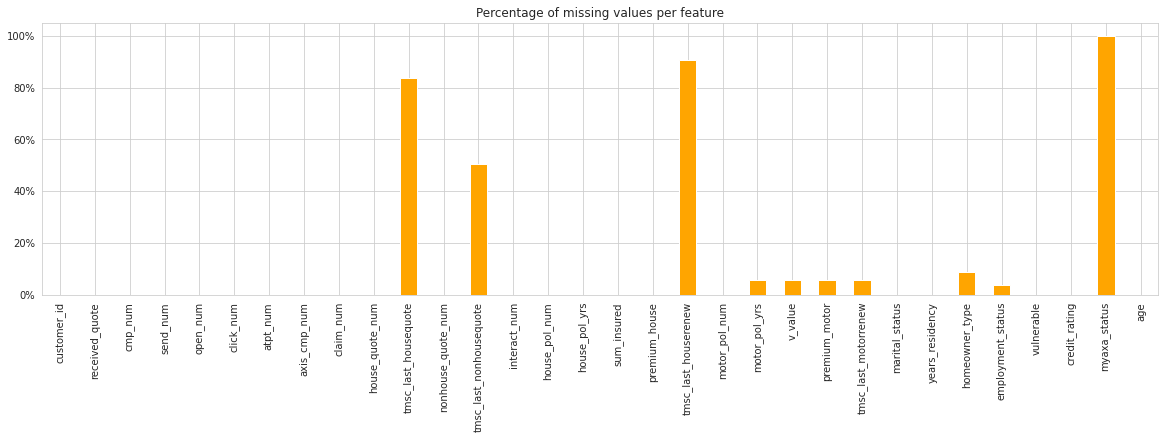

In [58]:
new_data = data.copy()
new_data.isna().sum()
plt.figure(figsize = (20,5))        

ax = (new_data.isnull().mean() * 100).plot(kind='bar', color ='orange')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of missing values per feature')



Nulls are present in our data, numerical variables count are greater. 

In [59]:
df_pivot = pd.DataFrame({'types': new_data.dtypes,
                         'nulls': new_data.isna().sum(),
                          '% nulls': new_data.isna().sum() / data.shape[0],
                          'size': new_data.shape[0],
                          'uniques': new_data.nunique()})
df_pivot

types  nulls   % nulls   size  uniques
customer_id                int64      0  0.000000  59774    59589
received_quote             int64      0  0.000000  59774        2
cmp_num                    int64      0  0.000000  59774        7
send_num                   int64      0  0.000000  59774        7
open_num                   int64      0  0.000000  59774        7
click_num                  int64      0  0.000000  59774        3
atpt_num                   int64      0  0.000000  59774       14
axis_cmp_num               int64      0  0.000000  59774        6
claim_num                  int64      0  0.000000  59774        7
house_quote_num            int64      0  0.000000  59774       14
tmsc_last_housequote     float64  50009  0.836635  59774     1032
nonhouse_quote_num         int64      0  0.000000  59774       53
tmsc_last_nonhousequote  float64  30278  0.506541  59774     1087
interact_num               int64      0  0.000000  59774       87
house_pol_num              int64      0  0.000000  59774        9
house_pol_yrs              int64      0  0.000000  59774       38
sum_insured              float64      0  0.000000  59774      854
premium_house            float64      0  0.000000  59774     3967
tmsc_last_houserenew     float64  54249  0.907569  59774     1809
motor_pol_num              int64      0  0.000000  59774        9
motor_pol_yrs            float64   3479  0.058203  59774       54
v_value                  float64   3479  0.058203  59774     1148
premium_motor            float64   3479  0.058203  59774    38912
tmsc_last_motorrenew     float64   3479  0.058203  59774      600
marital_status            object      0  0.000000  59774        6
years_residency            int64      0  0.000000  59774       91
homeowner_type            object   5302  0.088701  59774        6
employment_status         object   2376  0.039750  59774        6
vulnerable               float64     28  0.000468  59774        2
credit_rating             object     28  0.000468  59774        4
myaxa_status             float64  59774  1.000000  59774        0
age                      float64     55  0.000920  59774       79

**As more than 80% of the data for tmsc_last_houserenew, tmsc_last_housequote, myaxa_status is null also they dont impact our target variable, we wont use that for model building.**

In [20]:
data.drop(columns=['tmsc_last_houserenew','tmsc_last_housequote','myaxa_status'],axis = 1 , inplace = True)

Checking the correlation before imputing missing values to check imputation how much imputation affects correlation.

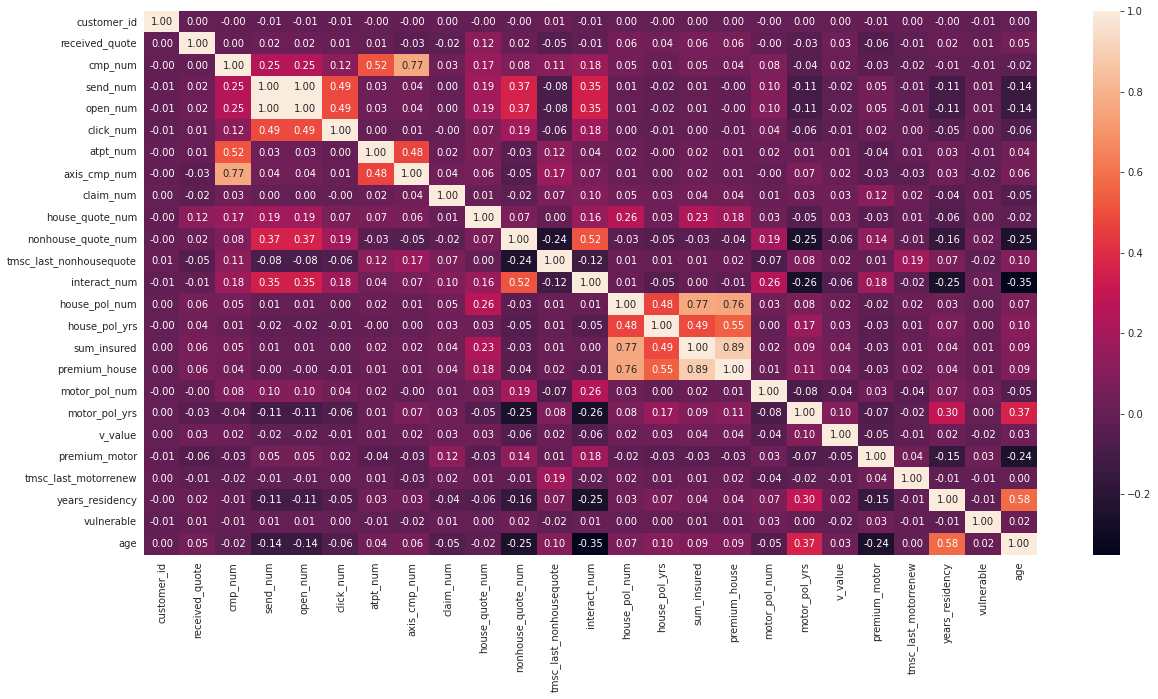

In [69]:
# Checking Pearson's correlation with a heatmap
# correlation matrix 
plt.figure(figsize = (20,10))        
sb.heatmap(data.corr(),annot = True, fmt='.2f')
plt.yticks(rotation=0) 
plt.show()

In [70]:
data.describe()

customer_id  received_quote  ...    vulnerable           age
count  5.977400e+04    59774.000000  ...  59746.000000  59719.000000
mean   1.501369e+07        0.101700  ...      0.008469     54.252382
std    2.888870e+06        0.302256  ...      0.091638     13.735858
min    1.000036e+07        0.000000  ...      0.000000     18.000000
25%    1.250975e+07        0.000000  ...      0.000000     43.000000
50%    1.502439e+07        0.000000  ...      0.000000     54.000000
75%    1.751295e+07        0.000000  ...      0.000000     65.000000
max    1.999995e+07        1.000000  ...      1.000000     99.000000

[8 rows x 25 columns]

Text(0.5, 1.0, 'Percentage of missing values per feature')

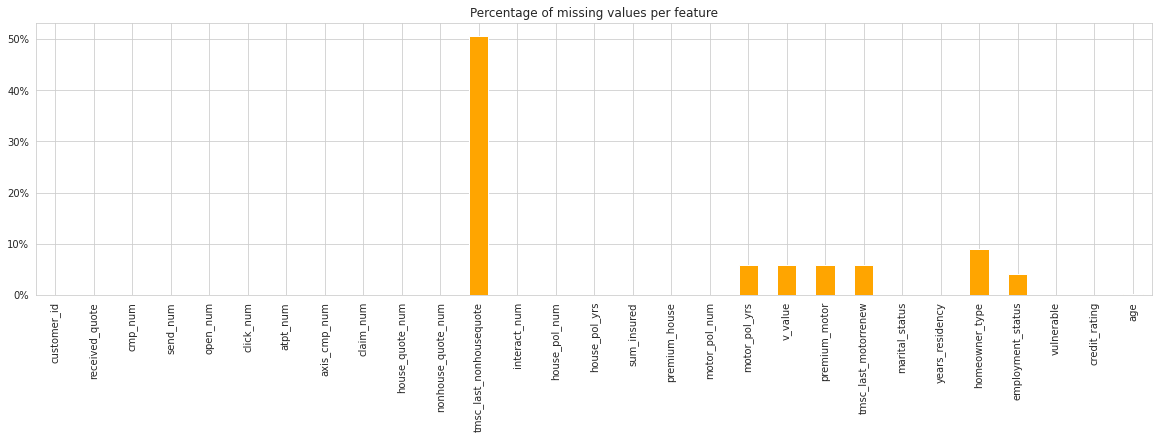

In [63]:
new_data = data.copy()
new_data.isna().sum()
plt.figure(figsize = (20,5))        

ax = (new_data.isnull().mean() * 100).plot(kind='bar', color ='orange')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of missing values per feature')



Checking the distribution of missing variables, and also the features with its correalted with.

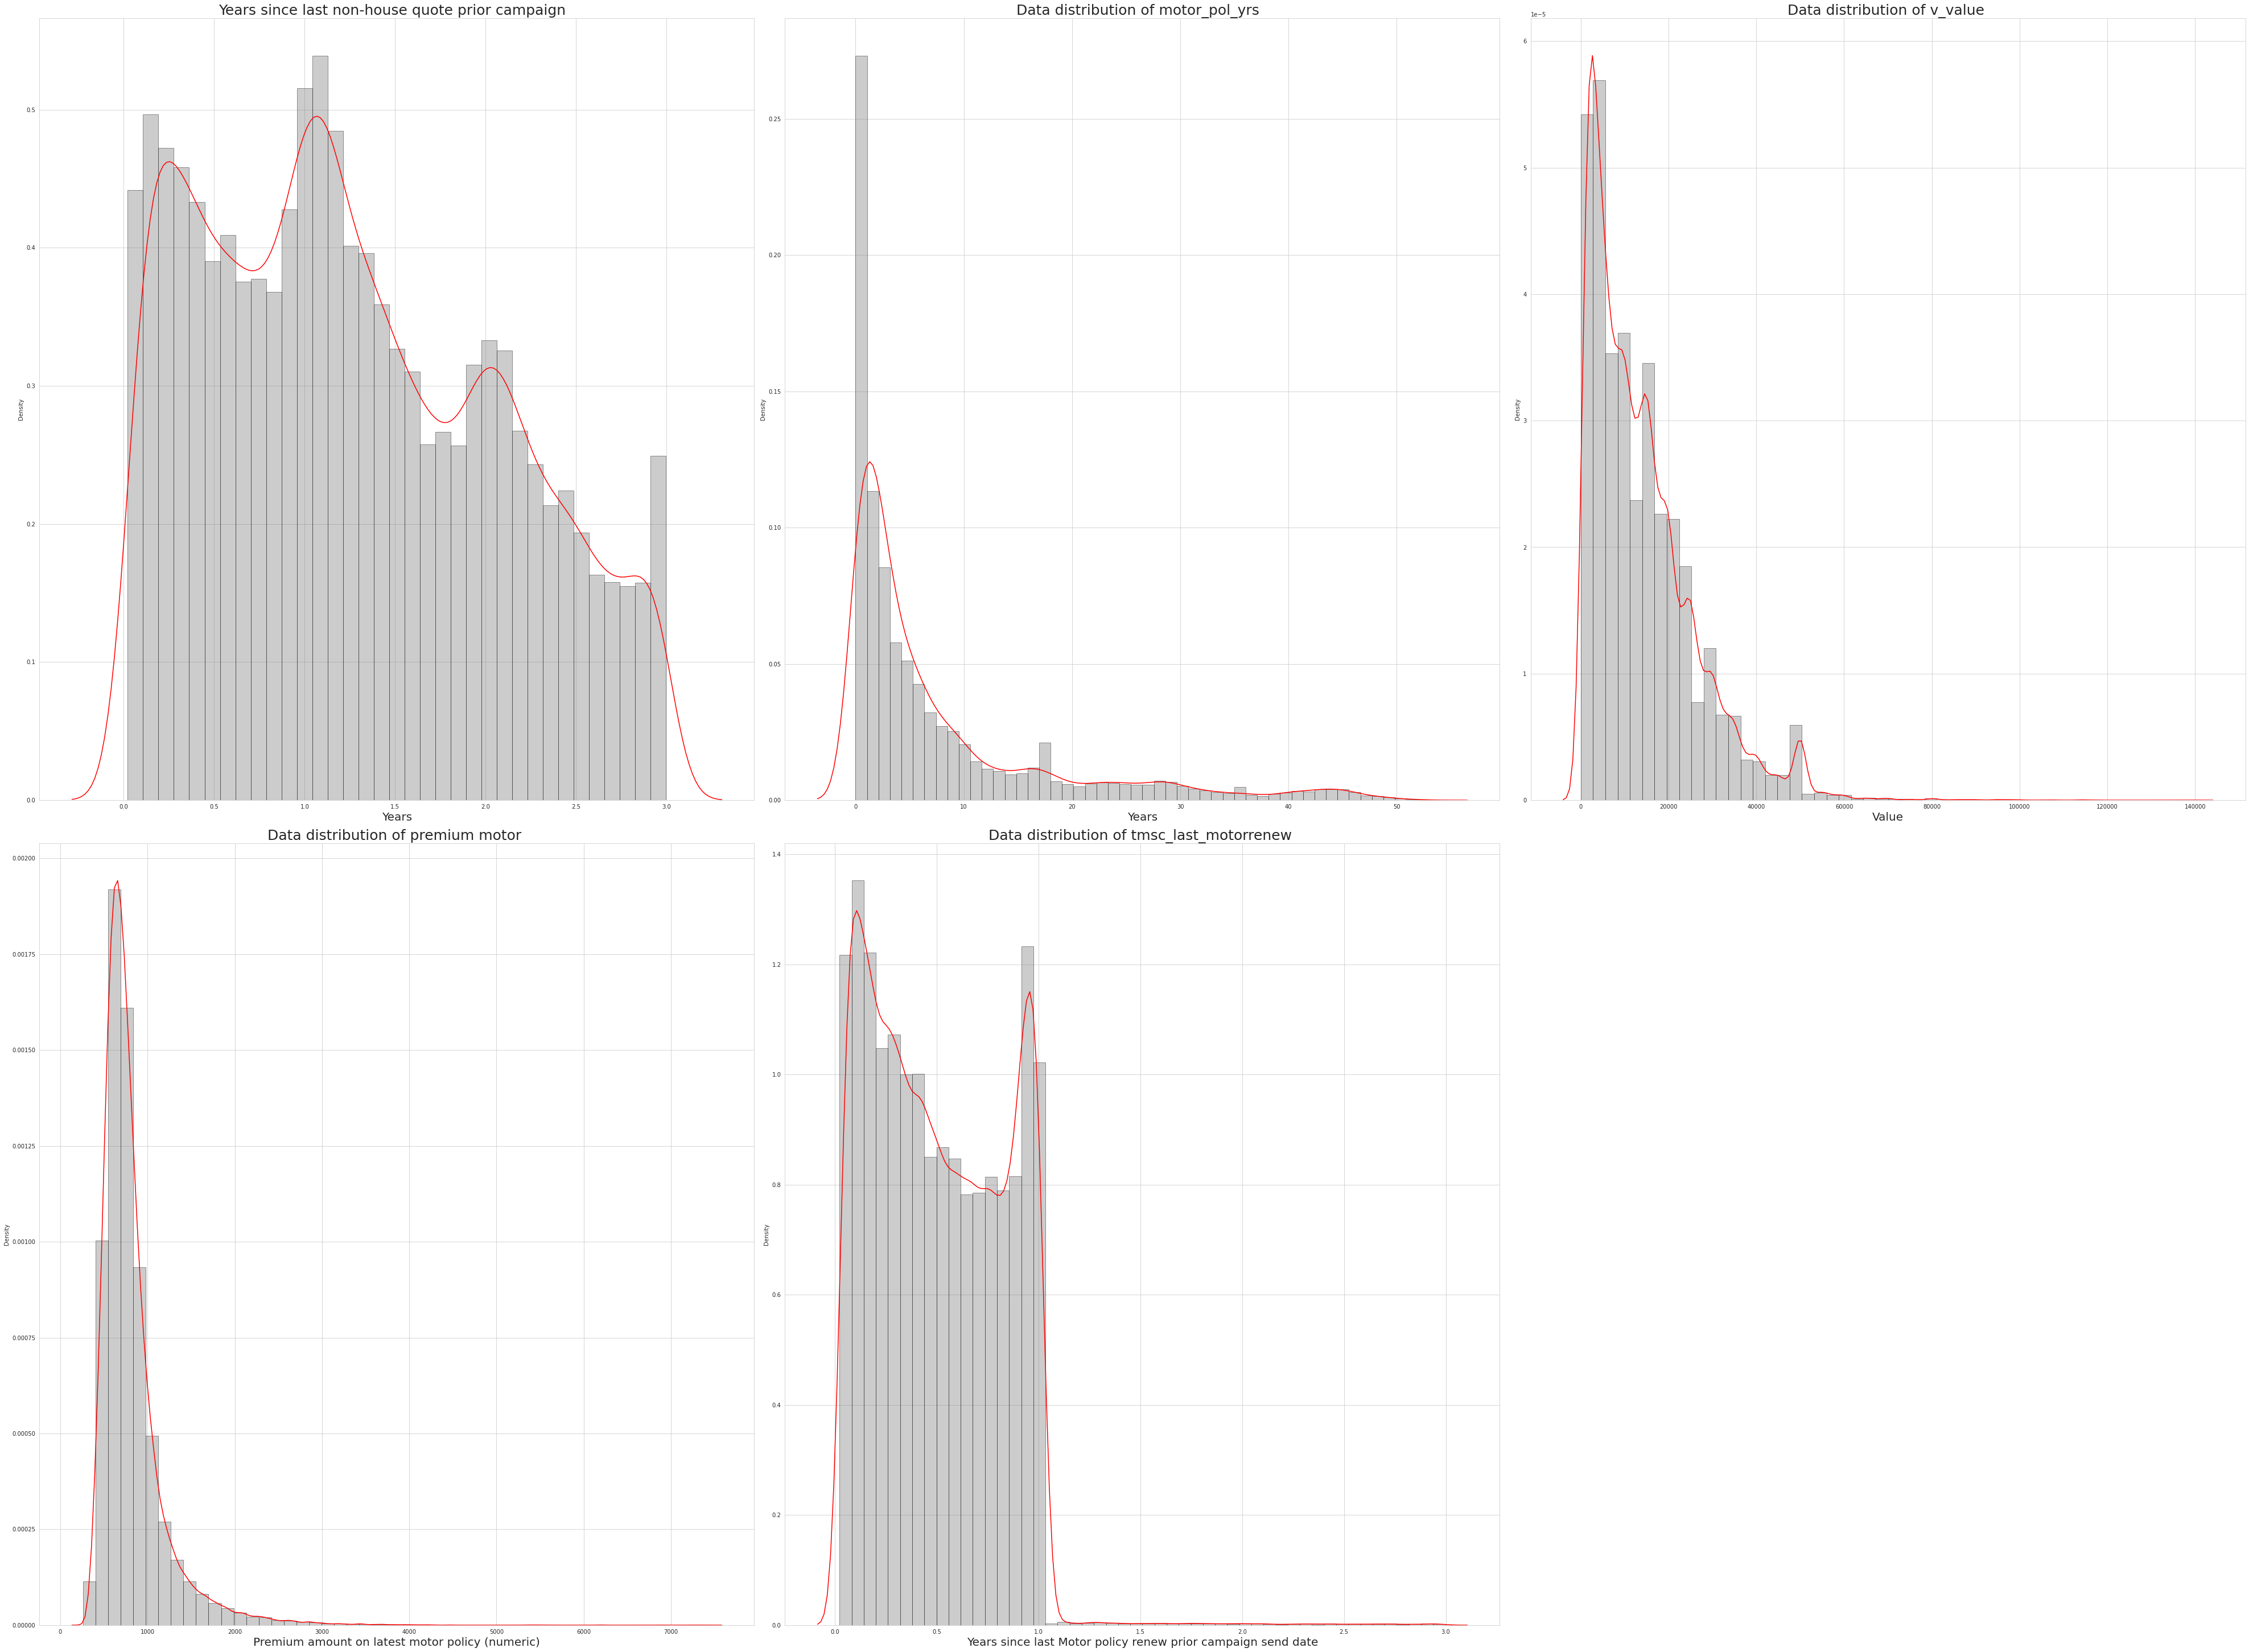

In [64]:
sb.set_style("whitegrid")
fig = plt.figure(figsize = [55,60])

ax1 = plt.subplot(3,3,1)
sb.distplot(data['tmsc_last_nonhousequote'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Years since last non-house quote prior campaign  "
ax1.set_title(plot_name,fontsize = 25)
plt.xlabel("Years",fontsize=20)

ax1 = plt.subplot(3,3,2)
sb.distplot(data['motor_pol_yrs'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of motor_pol_yrs  "
ax1.set_title(plot_name,fontsize = 25)
plt.xlabel("Years",fontsize=20)


ax2 = plt.subplot(3,3,3)
sb.distplot(data['v_value'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of v_value "
ax2.set_title(plot_name,fontsize = 25)
plt.xlabel("Value",fontsize=20)


ax3 = plt.subplot(3,3,4)
sb.distplot(data['premium_motor'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of premium motor "
ax3.set_title(plot_name,fontsize = 25)
plt.xlabel("Premium amount on latest motor policy (numeric)",fontsize=20)


ax4 = plt.subplot(3,3,5)
sb.distplot(data['tmsc_last_motorrenew'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Data distribution of tmsc_last_motorrenew "
ax4.set_title(plot_name,fontsize = 25)
plt.xlabel("Years since last Motor policy renew prior campaign send date",fontsize=20)



plt.tight_layout()
plt.show() 



**As tmsc_last_motorrenew is uniformly distributed and less than 10% of values are missing lets replace it with mean**

In [21]:
tmsc_last_motorrenew_mean = data['tmsc_last_motorrenew'].mean()
data['tmsc_last_motorrenew'].fillna(tmsc_last_motorrenew_mean,inplace = True)

**As more than 40% of tmsc_last_nonhousequote is null, to fill missing values lets fill it with the help of correlation. AS tmsc_last_motorrenew are correlated, will group by tmsc_last_motorrenew where tmsc_last_nonhousequote is null.**

Text(0.5, 0, 'Years')

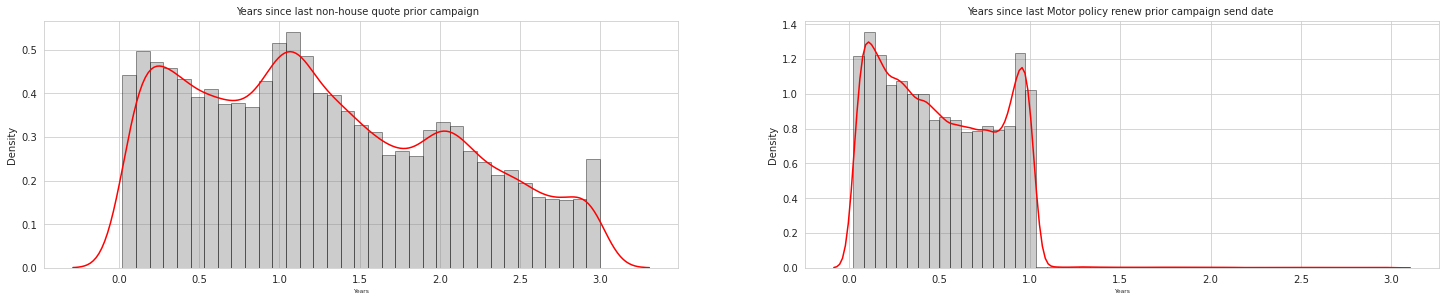

In [126]:
sb.set_style("whitegrid")
fig = plt.figure(figsize = [25,10])

ax1 = plt.subplot(2,2,1)
sb.distplot(data['tmsc_last_nonhousequote'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Years since last non-house quote prior campaign  "
ax1.set_title(plot_name,fontsize = 10)
plt.xlabel("Years",fontsize=6)


ax1 = plt.subplot(2,2,2)
sb.distplot(data['tmsc_last_motorrenew'], hist_kws=dict(edgecolor="k", linewidth=1,color='grey'), color='red')
plot_name = "Years since last Motor policy renew prior campaign send date "
ax1.set_title(plot_name,fontsize = 10)
plt.xlabel("Years",fontsize=6)






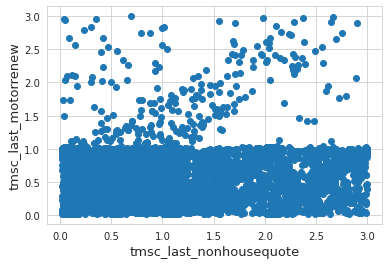

In [81]:
#Similarly visualising for tmsc_last_nonhousequote
fig, ax = plt.subplots()
ax.scatter(x = data['tmsc_last_nonhousequote'], y = data['tmsc_last_motorrenew'])
plt.xticks()
plt.ylabel('tmsc_last_motorrenew', fontsize=13)
plt.xlabel('tmsc_last_nonhousequote', fontsize=13)
plt.show()

**Filling tmsc_last_nonhousequote missing values with the help of tmsc_last_motorrenew as its correalted to it**

In [22]:
#Filtering data based on tmsc_last_nonhousequote null values
new_data = data.loc[data['tmsc_last_nonhousequote'].isna()].reset_index()

In [23]:
#Iterating over null values of tmsc_last_nonhousequote and taking tmsc_last_motorrenew value where the value tmsc_last_nonhousequote is null,
# then filtering data based on tmsc_last_motorrenew value and then imputing it with the filtered data mean. 

for index in range(0, len(new_data)):
    motor_renw_years = new_data.iloc[index]['tmsc_last_motorrenew']
    filter_df_motor_renw_years = data[data['tmsc_last_motorrenew'] == motor_renw_years]
    filter_df_motor_renw_years_mean =  filter_df_motor_renw_years['tmsc_last_nonhousequote'].mean() 
    #if the mean of filtered df is null then use the mean of tmsc_last_motorrenew column.
    if(math.isnan(filter_df_motor_renw_years_mean)):
      tmsc_last_nonhousequote_mean =  data['tmsc_last_nonhousequote'].mean()
      new_data['tmsc_last_nonhousequote'].fillna(tmsc_last_nonhousequote_mean,inplace = True) 
    else:
      new_data['tmsc_last_nonhousequote'] = np.where((new_data['index']==index), filter_df_motor_renw_years_mean, new_data['tmsc_last_nonhousequote'])   

    
new_data.drop(columns = ['index'],axis=1,inplace=True)

#merging imputed tmsc_last_motorrenew column dataframe with original one
data = pd.merge(data,
                 new_data[['customer_id', 'tmsc_last_nonhousequote']],
                 on='customer_id',how='left')
data['tmsc_last_nonhousequote_y']= np.where(data['tmsc_last_nonhousequote_y'].isnull(), data['tmsc_last_nonhousequote_x'], data['tmsc_last_nonhousequote_y'])   

data.drop(columns=['tmsc_last_nonhousequote_x'],axis=1,inplace=True)
data.rename(columns={"tmsc_last_nonhousequote_y":"tmsc_last_nonhousequote"},inplace=True)

similarly motor_pol_yrs is correlated with age, lets use it to repalce nan values

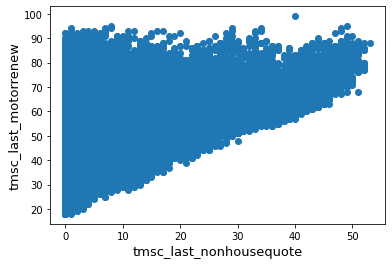

In [26]:
#Similarly visualising for motor_pol_yrs
fig, ax = plt.subplots()
ax.scatter(x = data['motor_pol_yrs'], y = data['age'])
plt.xticks()
plt.ylabel('motor_pol_yrs', fontsize=13)
plt.xlabel('age', fontsize=13)
plt.show()

**Similarly filling motor_pol_yrs missing values with the help of age as its correalted to it**

In [24]:
new_data = data.loc[data['motor_pol_yrs'].isna()].reset_index()


In [25]:
for index in range(0, len(new_data)):
    age = new_data.iloc[index]['age']
    filter_age = data[data['age'] == age]
    filter_motor_pol_yrs_mean =  filter_age['motor_pol_yrs'].mean() 

    if(math.isnan(filter_motor_pol_yrs_mean)):
       filter_motor_pol_yrs_median =  data['motor_pol_yrs'].median()
       new_data['motor_pol_yrs'].fillna(filter_motor_pol_yrs_median,inplace = True) 
    else:
       new_data['motor_pol_yrs'] = np.where((new_data['index']==index), filter_motor_pol_yrs_mean, new_data['motor_pol_yrs'])   

new_data.drop(columns = ['index'],axis=1,inplace=True)
    
data = pd.merge(data,
                 new_data[['customer_id', 'motor_pol_yrs']],
                 on='customer_id',how='left')

data['motor_pol_yrs_y']= np.where(data['motor_pol_yrs_y'].isnull(), data['motor_pol_yrs_x'], data['motor_pol_yrs_y'])   

data.drop(columns=['motor_pol_yrs_x'],axis=1,inplace=True)
data.rename(columns={"motor_pol_yrs_y":"motor_pol_yrs"},inplace=True)

In [80]:
data

customer_id  received_quote  ...  tmsc_last_nonhousequote  motor_pol_yrs
0         12661631               0  ...                 1.492694            3.0
1         16626626               0  ...                 1.161240            3.0
2         12298320               0  ...                 2.290411           21.0
3         13366118               0  ...                 1.221243            3.0
4         12948775               0  ...                 2.353425            2.0
...            ...             ...  ...                      ...            ...
59897     15030186               0  ...                 2.580822            2.0
59898     14470926               0  ...                 2.391781            4.0
59899     13190929               0  ...                 2.378082            2.0
59900     14304407               0  ...                 1.726027            1.0
59901     15483812               1  ...                 0.989041            1.0

[59902 rows x 29 columns]

**As v_value,premium_motor have skewed distribution lets replace na values with median, also vulnerable, credit_rating,age has null values lets replace it with median** 

In [26]:
v_value_median =  data['v_value'].median()
premium_motor_median =  data['premium_motor'].median()
vulnerable_median =  data['vulnerable'].median()
age_median =  data['age'].median()


data['v_value'].fillna(v_value_median,inplace = True)
data['premium_motor'].fillna(premium_motor_median,inplace = True)
data['vulnerable'].fillna(vulnerable_median,inplace = True)
data['age'].fillna(age_median,inplace = True)

label=LabelEncoder()
data['credit_rating'] = label.fit_transform(data['credit_rating'])
data['employment_status'] = label.fit_transform(data['employment_status'])
data['homeowner_type'] = label.fit_transform(data['homeowner_type'])



credit_rating_median =  data['credit_rating'].median()
employment_status_median =  data['employment_status'].median()
homeowner_type_median =  data['homeowner_type'].median()

data['credit_rating'].fillna(credit_rating_median,inplace = True)
data['employment_status'].fillna(employment_status_median,inplace = True)
data['homeowner_type'].fillna(homeowner_type_median,inplace = True)

**Our Data has class imbalance problem, data from Axa client is mostly biased towards cases where client did not recieve the quote after the campaign.** 

In [53]:
count= pd.value_counts(data['received_quote'],sort=True).sort_index()
count.plot(kind='bar')
plt.title("Recieved Quote after the campaign Countplot 90% said no 10% said yes")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Lets do correlation analysis, filling null values has not changed correlation matrix much.

Also as visible number of house quotes prior to campaign affects the target variable a lot. Also premium on latest motor policy, number of axis campaign sent years since last non house quote , number of claims are negatively correlated with the target variable.
 High postive correlation and High negative correlation both are important to categorise deposit subscription.

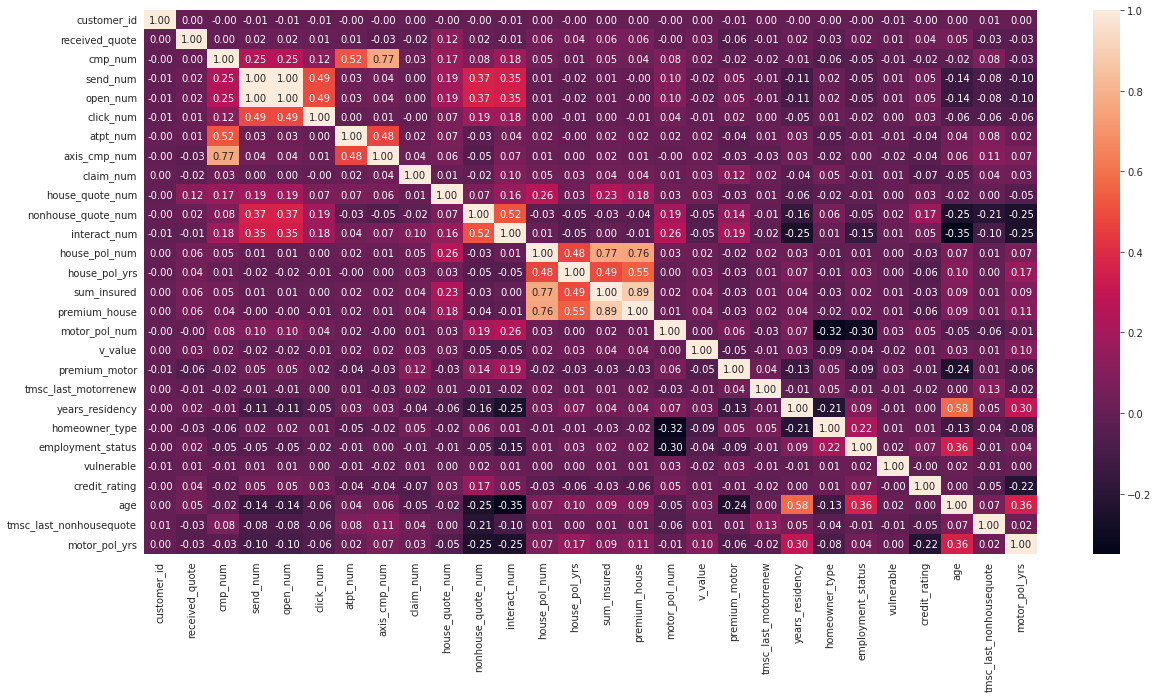

In [87]:
# Checking Pearson's correlation with a heatmap
# correlation matrix 
plt.figure(figsize = (20,10))        
sb.heatmap(data.corr(),annot = True, fmt='.2f')
plt.yticks(rotation=0) 
plt.show()

In [17]:
data

customer_id  received_quote  ...  tmsc_last_nonhousequote  motor_pol_yrs
0         12661631               0  ...                 1.492694            3.0
1         16626626               0  ...                 1.161240            3.0
2         12298320               0  ...                 2.290411           21.0
3         13366118               0  ...                 1.221243            3.0
4         12948775               0  ...                 2.353425            2.0
...            ...             ...  ...                      ...            ...
59897     15030186               0  ...                 2.580822            2.0
59898     14470926               0  ...                 2.391781            4.0
59899     13190929               0  ...                 2.378082            2.0
59900     14304407               0  ...                 1.726027            1.0
59901     15483812               1  ...                 0.989041            1.0

[59902 rows x 29 columns]

## **EDA**

<Figure size 5760x1440 with 0 Axes>

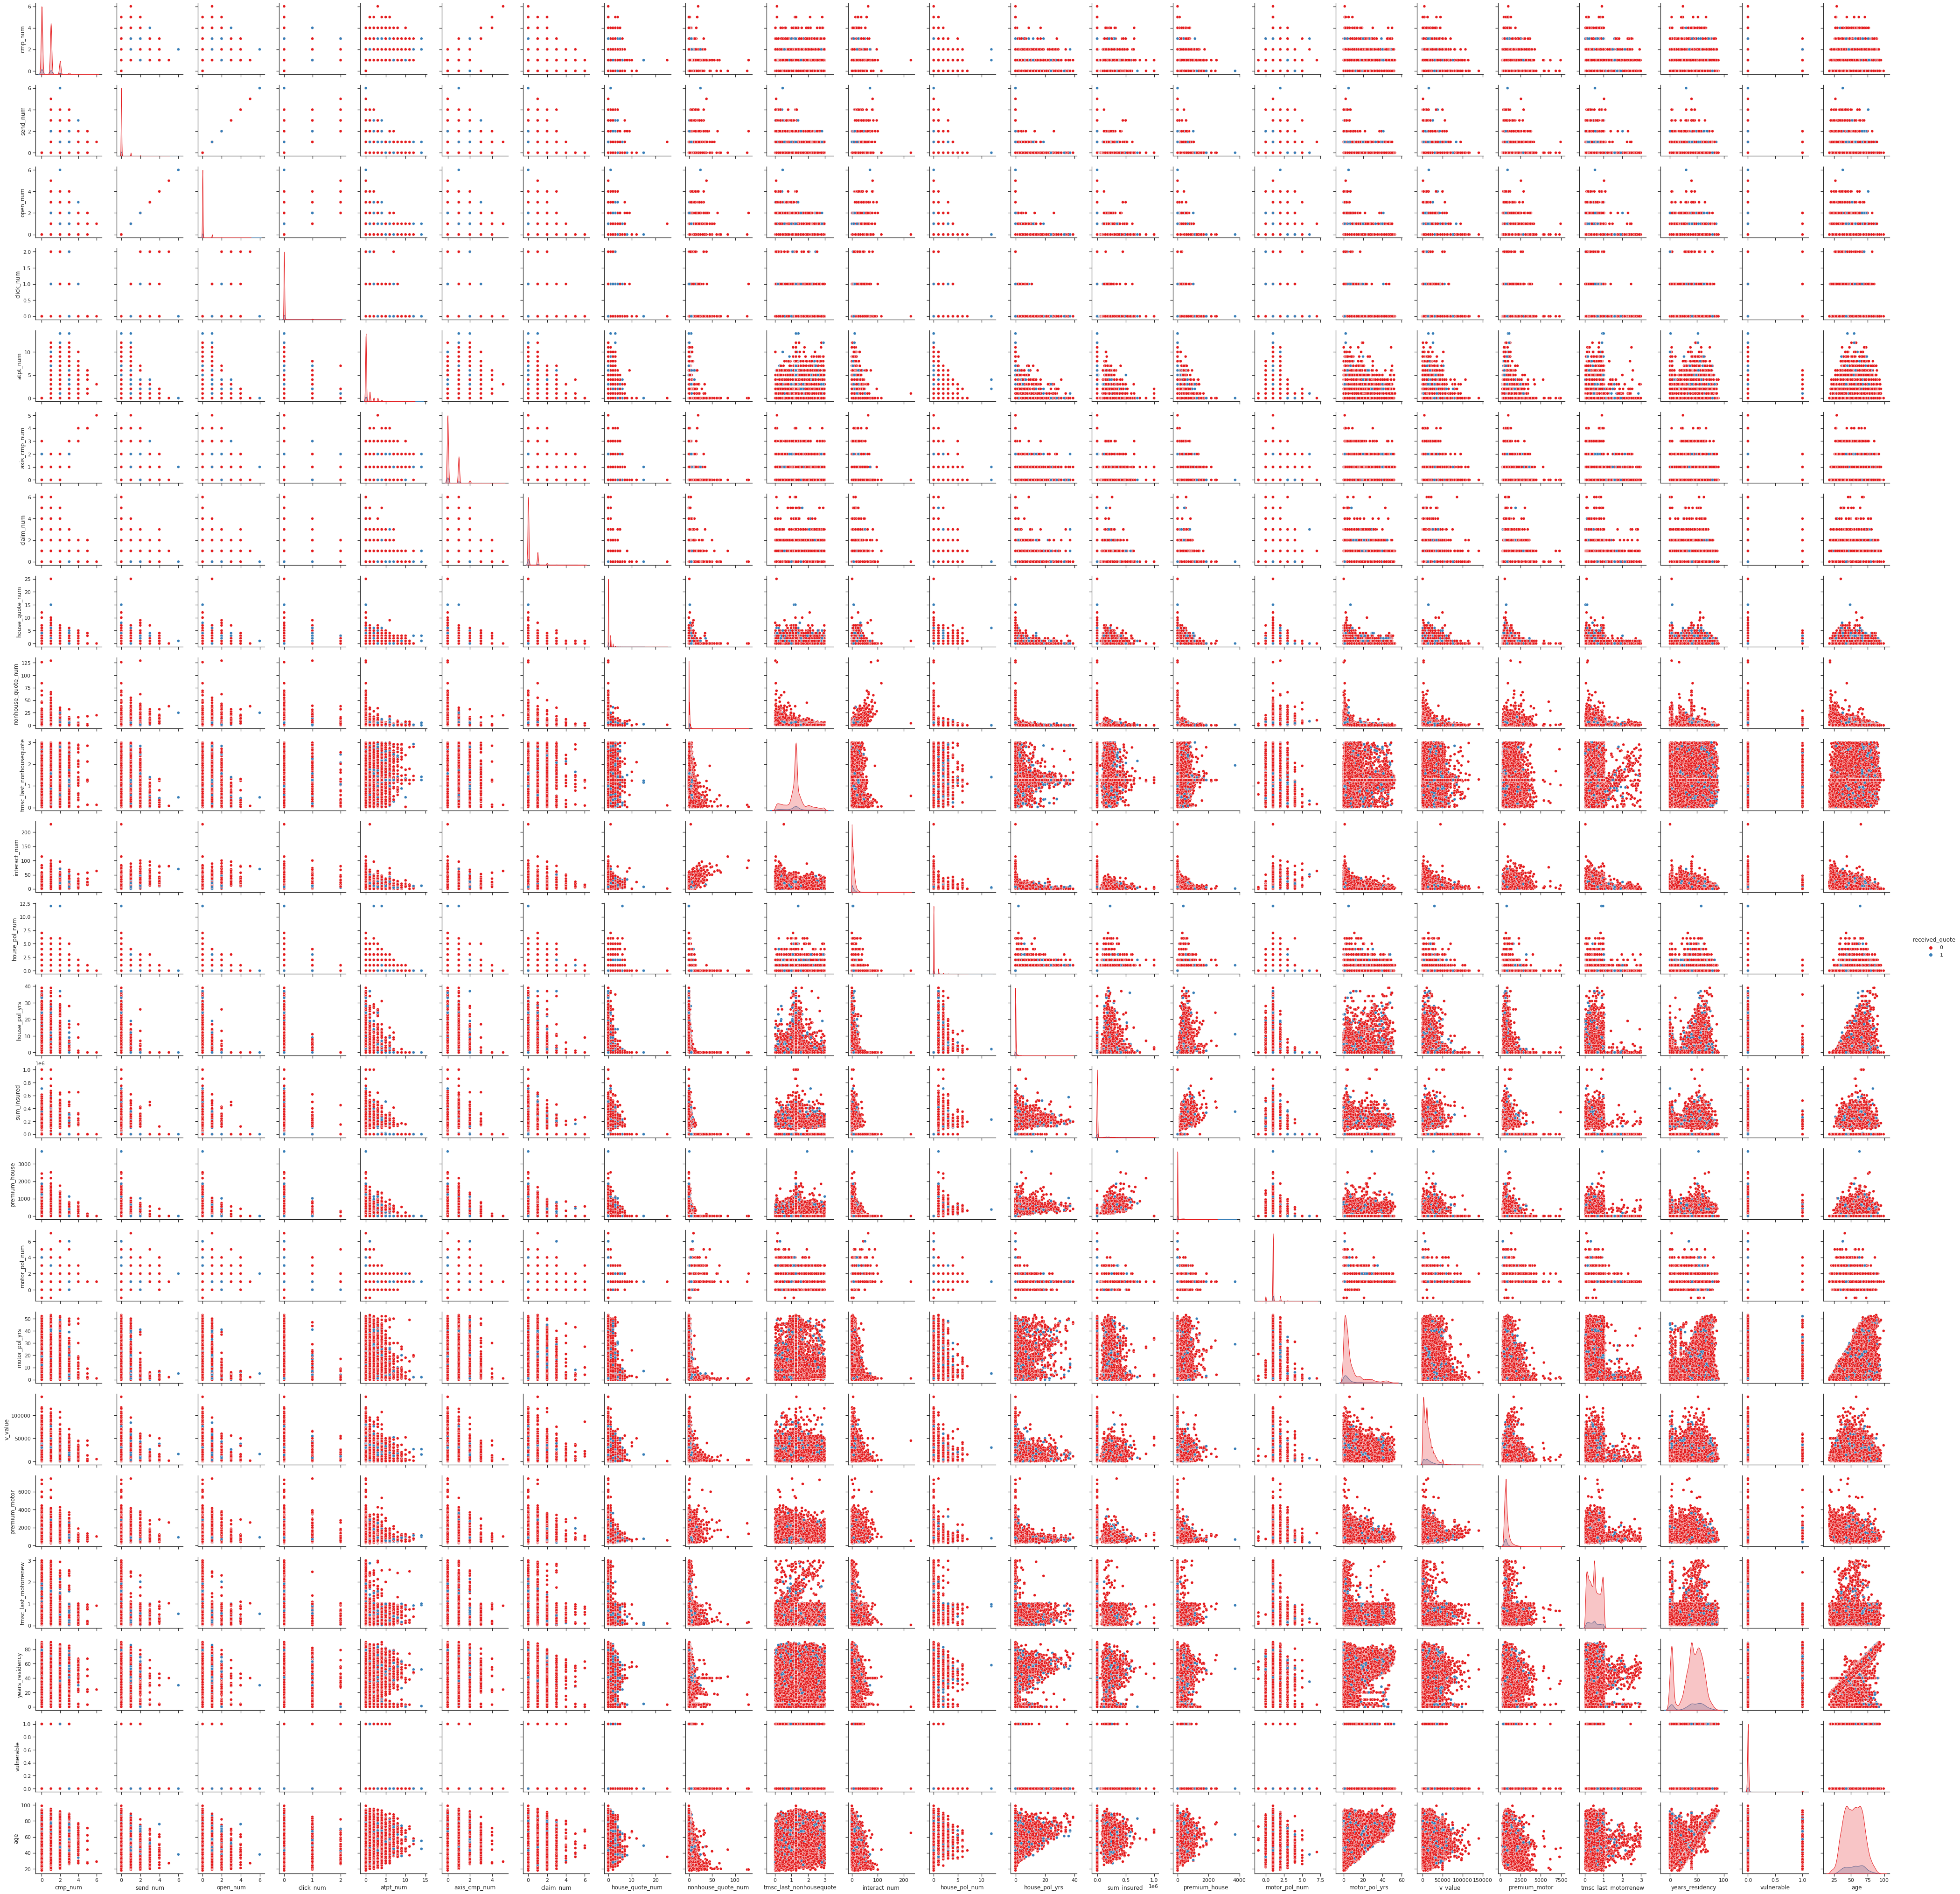

In [93]:
plt.figure(figsize = (80,20))        

sb.set(style="ticks")
sb.pairplot( data[['received_quote', 'cmp_num', 'send_num', 'open_num', 'click_num', 'atpt_num', 'axis_cmp_num', 'claim_num', 'house_quote_num', 'nonhouse_quote_num', 'tmsc_last_nonhousequote', 'interact_num', 'house_pol_num', 'house_pol_yrs', 'sum_insured', 'premium_house', 'motor_pol_num', 'motor_pol_yrs', 'v_value', 'premium_motor', 'tmsc_last_motorrenew', 'years_residency', 'vulnerable', 'age']]  , hue="received_quote", palette="Set1")
plt.show()


**<br>
<br>
<br>
As age increases amount sum insured on policy also increases so mean per age would also increase same with premium<br>
As years since last motor policy increases number of house quotes increases overtime<br>
Premium on motor is inversely proportional to number of house quotes<br>
num_motor policy is inversely proportional to number of house quotes<br>**

**More number of call attempts leads to better conversion  to more aged people**

In [13]:
import seaborn as sns
dur_cam = sns.lmplot(x='atpt_num', y='age',data = data,
                     hue = 'received_quote',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.ylabel('Age of customers')
plt.xlabel('Number of attempt of Calls ')

plt.show()

Number of house quotes is proportional t age also increases number of received quote 

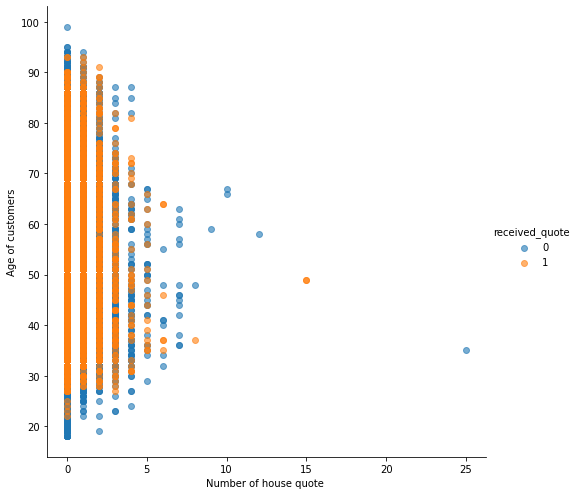

In [15]:
import seaborn as sns
dur_cam = sns.lmplot(x='house_quote_num', y='age',data = data,
                     hue = 'received_quote',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.ylabel('Age of customers')
plt.xlabel('Number of house quote ')

plt.show()

**As age increases number of years since last house policy  increases also leads to better possibility of conversion**

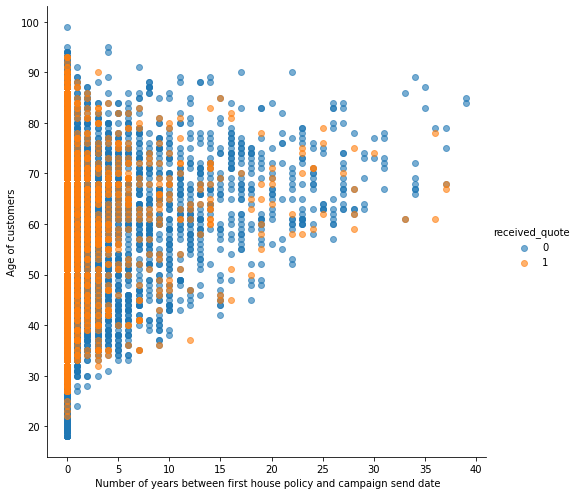

In [16]:
import seaborn as sns
dur_cam = sns.lmplot(x='house_pol_yrs', y='age',data = data,
                     hue = 'received_quote',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.ylabel('Age of customers')
plt.xlabel(' Number of years between first house policy and campaign send date')

plt.show()

**Customer with credit rating C gives maximum number of quotes**<br>
**Customer with Employment gives maximum number of quotes**<br>
**Customer with their own house/apartment gives maximum number of quotes**<br>
**Customer who are single gives maximum number of quotes**<br>

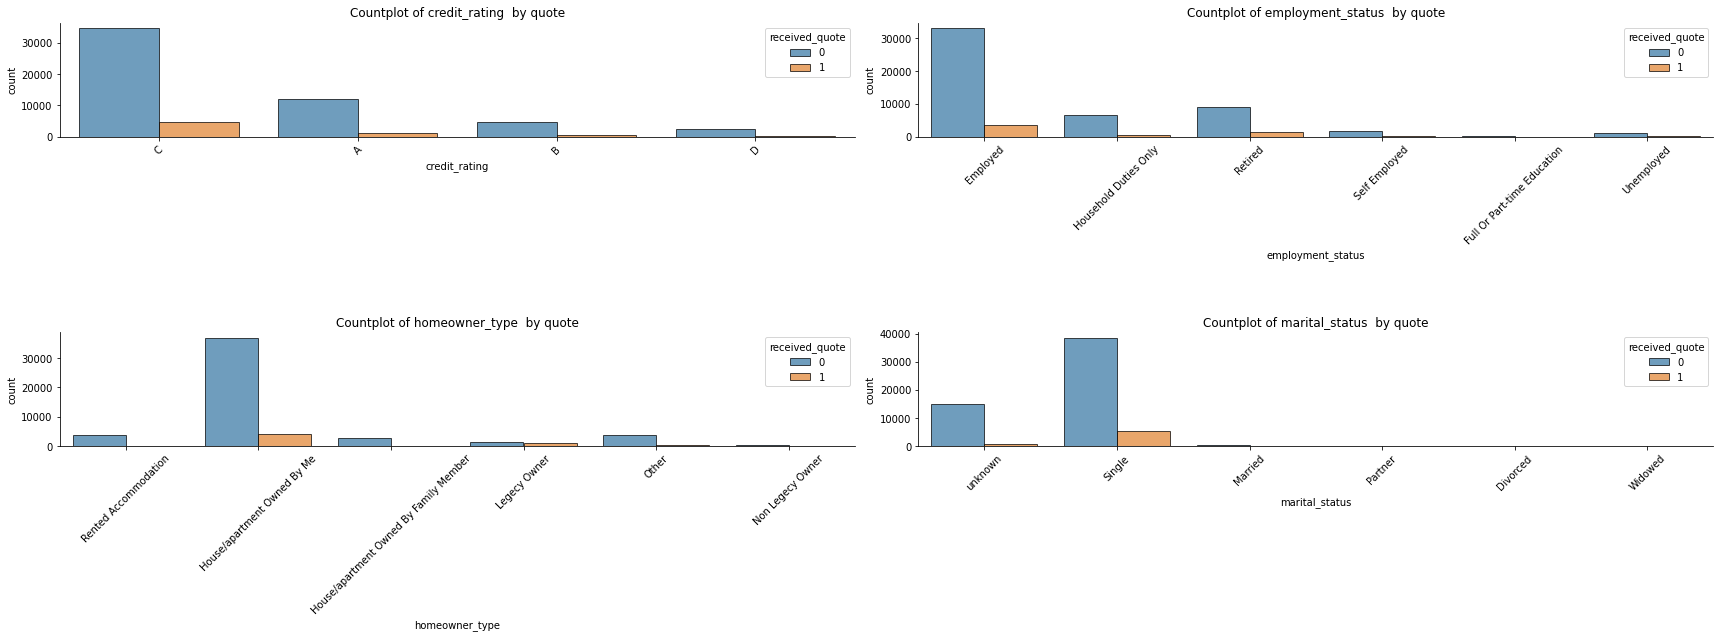

In [32]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[24,15])
features=["credit_rating", "employment_status", "homeowner_type", "marital_status"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sb.countplot(x=f, hue='received_quote', edgecolor="black", alpha=0.7, data=data)
    sb.despine()
    plt.xticks(rotation=45)

    plt.title("Countplot of {}  by quote".format(f))
    n=n+1
plt.tight_layout()
plt.show()



# Feature Engineering

**Calculating mean,sum,max,min number of house quote per age**

In [34]:
data['mean_house_quote_num_per_age']=data.groupby(['age'])['house_quote_num'].transform('mean')
data['sum_house_quote_num_per_age']=data.groupby(['age'])['house_quote_num'].transform('sum')
data['max_house_quote_num_per_age']=data.groupby(['age'])['house_quote_num'].transform('max')
data['min_house_quote_num_per_age']=data.groupby(['age'])['house_quote_num'].transform('min')

**Calculating mean,sum,max,min number of years since last house policy per age**

In [35]:
data['mean_house_pol_yrs_per_age']=data.groupby(['age'])['house_pol_yrs'].transform('mean')
data['sum_house_pol_yrs_per_age']=data.groupby(['age'])['house_pol_yrs'].transform('sum')
data['max_house_pol_yrs_per_age']=data.groupby(['age'])['house_pol_yrs'].transform('max')
data['min_house_pol_yrs_per_age']=data.groupby(['age'])['house_pol_yrs'].transform('min')

**Calculating mean,sum,max,min sum insured per age**

In [36]:
data['mean_sum_insured_per_age']=data.groupby(['age'])['sum_insured'].transform('mean')
data['sum_sum_insured_per_age']=data.groupby(['age'])['sum_insured'].transform('sum')
data['max_sum_insured_per_age']=data.groupby(['age'])['sum_insured'].transform('max')
data['min_sum_insured_per_age']=data.groupby(['age'])['sum_insured'].transform('min')

**Calculating mean,sum,max,min house premium per age**

In [37]:
data['mean_premium_house_per_age']=data.groupby(['age'])['premium_house'].transform('mean')
data['sum_premium_house_per_age']=data.groupby(['age'])['premium_house'].transform('sum')
data['max_premium_house_per_age']=data.groupby(['age'])['premium_house'].transform('max')
data['min_premium_house_per_age']=data.groupby(['age'])['premium_house'].transform('min')

**Calculating premium house per age ratio**<br>
**Calculating sum insured per age ratio**<br>


In [38]:
data["premium_age_ratio"] = data["premium_house"]/data["age"]
data["sum_insured_age_ratio"] = data["sum_insured"]/data["age"]


**Calculating customer response to send campiagns**<br>


In [39]:
data["costumer_respond_num"] = data['open_num']+data['click_num']


In [40]:
data['premium_house_house_pol_num_ratio'] = data['premium_house']/data['house_pol_num']

data['premium_house_house_pol_num_ratio'].fillna(0,inplace=True)

In [41]:
data['sum_insured_house_pol_num_ratio'] = data['sum_insured']/data['house_pol_num']
data['sum_insured_house_pol_num_ratio'].fillna(0,inplace=True)

In [42]:

data['house_pol_motor_pol_years_ratio'] = data['house_pol_yrs']/data['motor_pol_yrs']
data['premium_house_motor_ratio'] = data['premium_house']/data['premium_motor']


In [43]:
data['sum_insured_premium_ratio'] = data['sum_insured']/data['premium_house']
data.fillna(0,inplace=True)

In [35]:
#data.drop(columns=['premium_house_house_quote_ratio'],axis=1,inplace=True)

**Converting age columns in to age bins will help to classify better**

In [45]:
hist, bin_edg = np.histogram(data['age'].values,bins='sturges')
Bin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
data['Age_group'] = Bin.fit_transform(data['age'].values.reshape(-1, 1))

Imputing using KNN imputation for the numerical data

In [46]:
Numerical_variables = list(data.select_dtypes(include=[np.float64,np.int64]).columns)
Categorical_variables = list(data.select_dtypes(include=[object]).columns)


In [47]:
data_numeric= data[Numerical_variables]
data_categor= data[Categorical_variables]


In [51]:
"""imputer = KNNImputer(n_neighbors=5)
data_numeric[:] = imputer.fit_transform(data_numeric)"""

'imputer = KNNImputer(n_neighbors=5)\ndata_numeric[:] = imputer.fit_transform(data_numeric)'

**Normalizing numeric values**

In [48]:
columns_to_normalize = ['sum_insured', 'premium_house', 'v_value',
       'premium_motor', 'sum_house_quote_num_per_age','sum_house_pol_yrs_per_age',
       'mean_sum_insured_per_age', 'sum_sum_insured_per_age',
       'max_sum_insured_per_age',
       'mean_premium_house_per_age', 'sum_premium_house_per_age',
       'max_premium_house_per_age', 'sum_insured_age_ratio', 
       'sum_insured_premium_ratio']

In [49]:
def z_score_v1(x, mean, std):
  if std == 0:
    return 0
  else:
    return (x - mean) / std

In [50]:
for col in columns_to_normalize:
  col_mean = data_numeric[col].mean()
  col_std = data_numeric[col].std()
  data_numeric[col] = data_numeric[col].apply(z_score_v1, args=(col_mean, col_std))

In [51]:
data.replace([np.inf, -np.inf], 0, inplace=True)


In [52]:
data_numeric

customer_id  received_quote  ...  sum_insured_premium_ratio  Age_group
0         12661631               0  ...                  -0.009185        0.0
1         16626626               0  ...                  -0.009185        2.0
2         12298320               0  ...                  -0.008784        3.0
3         13366118               0  ...                  -0.009185        6.0
4         12948775               0  ...                  -0.009185        4.0
...            ...             ...  ...                        ...        ...
59897     15030186               0  ...                  -0.009185        4.0
59898     14470926               0  ...                  -0.009185        3.0
59899     13190929               0  ...                  -0.009185        3.0
59900     14304407               0  ...                  -0.008072        4.0
59901     15483812               1  ...                  -0.009185        3.0

[59902 rows x 53 columns]

In [53]:
data_cat_encoded = pd.get_dummies(data_categor)

In [54]:
data = pd.concat([data_cat_encoded,data_numeric],axis=1)

In [62]:
data.replace([np.inf, -np.inf], 0, inplace=True)


In [ ]:
data_copy = data.copy()

**Stratified Sampling:**

**Failure of k-Fold Cross-Validation**
**Sadly, the k-fold cross-validation is not appropriate for evaluating imbalanced classifiers.**

**This might work fine for data with a balanced class distribution, but when the distribution is severely skewed, it is likely that one or more folds will have few or no examples from the minority class. This means that some or perhaps many of the model evaluations will be misleading, as the model need only predict the majority class correctly.**

<br>
What steps we should take before implementing stratified sampling in our train and test data?<br>
1) We need to see how our data is distributed. <br>
2) After noticiing that the column of recieved_quote contains 89% of "no" (Does not make an quote) and 11% of "yes" (Have made an house quote.) <br> 
3) We want to make sure that our training and test set contains the same ratio of 89% "no" and 11% "yes"." Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will make an house quote) is equally distributed. What do I mean by this? <br><br>


In [66]:

from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(data, data["received_quote"]):
    stratified_train = data.loc[train_set]
    stratified_test = data.loc[test_set]
    
display(stratified_train["received_quote"].value_counts()/len(data))
display(stratified_test["received_quote"].value_counts()/len(data))

0    0.718707
1    0.081283
Name: received_quote, dtype: float64

0    0.179693
1    0.020317
Name: received_quote, dtype: float64

Splitting train and test set

In [67]:
# Separate the labels and the features.
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['received_quote'].value_counts()


y_train = train_data['received_quote']
y_test = test_data['received_quote']

train_data.drop(labels=['received_quote'], axis=1,inplace=True)
test_data.drop(labels=['received_quote'], axis=1,inplace=True)

X_train = train_data
X_test = test_data

Data has class imbalance, biased towards the negative class. Hence higher chance of getting more number of negative classes(TN+FN). Ensembles such as bagging perform better on class imbalance. 

In [68]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),

}

## Training Classifiers on hold out set
As visible our data overfitted on hold out split


In [69]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [70]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.85 s
trained Nearest Neighbors in 0.03 s
trained Linear SVM in 49.37 s
trained Gradient Boosting Classifier in 21.18 s
trained Decision Tree in 1.45 s
trained Random Forest in 2.27 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       1.452160
5                 Random Forest     0.993322       2.270322
3  Gradient Boosting Classifier     0.900712      21.184388
1             Nearest Neighbors     0.900545       0.029090
2                    Linear SVM     0.898395      49.368543
0           Logistic Regression     0.898354       0.852008


## Will create cross validation split of sratified sampled train and test set to avoid overfitting

In [ ]:

# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18,class_weight='balanced')
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

cb_clf = CatBoostClassifier()
cb_scores = cross_val_score(cb_clf, X_train, y_train, cv=3)
cb_mean = cb_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC','Catboost Clf'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean,cb_mean]}

result_df = pd.DataFrame(data=d)

In [72]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

Classifiers  Crossval Mean Scores
6   Catboost Clf              0.900023
4     Grad B CLF              0.899167
5        Rand FC              0.899105
1            SVC              0.898395
0  Logistic Reg.              0.898354
2            KNN              0.891050
3       Dec Tree              0.830179

In [73]:
classifier = [cb_clf,grad_clf,log_reg,rand_clf]
cls_name=['Catboost','Gradient boosting','Logistic Regression','Randomforest']

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred ={}

y_train_pred[0] = cross_val_predict(cb_clf, X_train, y_train, cv=3)
cb_clf.fit(X_train, y_train)


Catboost Classifier accuracy is 0.90
------------------------------------------------------------------------------------------
Cross validating Gradient boosting
Gradient boosting Classifier accuracy is 0.90
------------------------------------------------------------------------------------------
Cross validating Logistic Regression
Logistic Regression Classifier accuracy is 0.90
------------------------------------------------------------------------------------------
Cross validating Randomforest
Randomforest Classifier accuracy is 0.90
------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
Classification report for Catboost
Precision Score:  0.5521390374331551
Recall Score:  0.08482234545081126
CatboostClassifier
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     43052
           1       0.55      0.08  

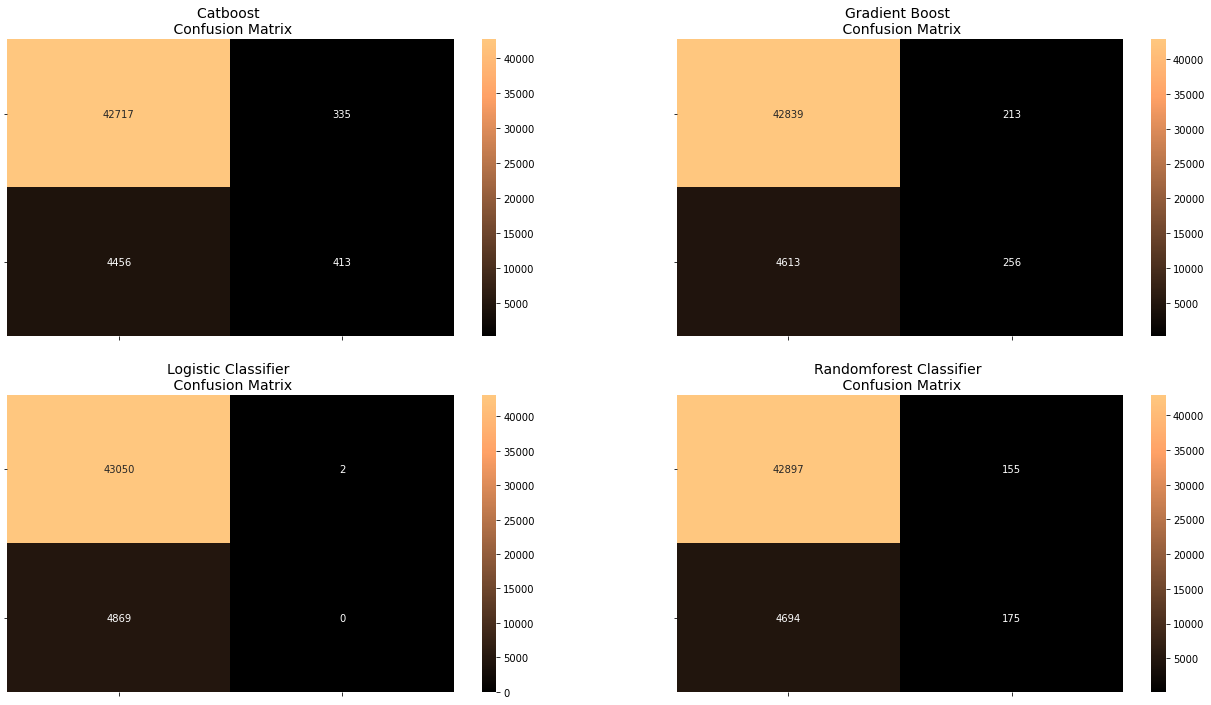

In [75]:
# Cross validate our Gradient Boosting Classifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
    

print(cls_name[0]+" Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred[0]))
for i,cl in enumerate(classifier[1:]):
    print('--'*45)
    print("Cross validating "+cls_name[i+1])   
    y_train_pred[i+1] = cross_val_predict(cl, X_train, y_train, cv=3)
    cl.fit(X_train, y_train)
    print(cls_name[i+1]+" Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred[i+1]))


cat_cf = confusion_matrix(y_train, y_train_pred[0])
grd_boost_cf = confusion_matrix(y_train, y_train_pred[1])
log_cf = confusion_matrix(y_train, y_train_pred[2])
rand_cf = confusion_matrix(y_train, y_train_pred[3])
    



fig, ax = plt.subplots(2, 2,figsize=(22,12))


sb.heatmap(cat_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper,fmt='g')
ax[0, 0].set_title("Catboost \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(grd_boost_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper,fmt='g')
ax[0][1].set_title("Gradient Boost \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(log_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper,fmt='g')
ax[1][0].set_title("Logistic Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sb.heatmap(rand_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper,fmt='g')
ax[1][1].set_title("Randomforest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


print('--'*45)
print()

for i,cl in enumerate(classifier):
    print('--'*45)
    print("Classification report for "+cls_name[i])   
    # Let's find the scores  for precision and recall.
    # The model is 77% sure that the potential client will suscribe to a term deposit. 
    # The model is only retaining 60% of clients that agree to suscribe a term deposit.
    print('Precision Score: ', precision_score(y_train, y_train_pred[i]))
    # The classifier only detects 60% of potential clients that will suscribe to a term deposit.
    print('Recall Score: ', recall_score(y_train, y_train_pred[i]))

    print(cls_name[i]+'Classifier')
    print(classification_report(y_train, y_train_pred[i]))

plt.show()

In [76]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred[0])

0.1470535873241944

Plotting Roc-auc curves 

In [ ]:
some_instance = X_train.iloc[1250,:].values
y_scores = cb_clf.predict_proba([some_instance])
# Increasing the threshold decreases the recall.
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
logistic_y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method="predict_proba")
rand_y_scores = cross_val_predict(rand_clf, X_train, y_train, cv=3, method="predict_proba")
cat_scores = cross_val_predict(cb_clf, X_train, y_train, cv=3, method="predict_proba")

# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if logistic_y_scores.ndim == 2:
    logistic_y_scores = logistic_y_scores[:, 1]
    
if rand_y_scores.ndim == 2:
    rand_y_scores = rand_y_scores[:, 1]

if cat_scores.ndim == 2:
    cat_scores = cat_scores[:, 1]

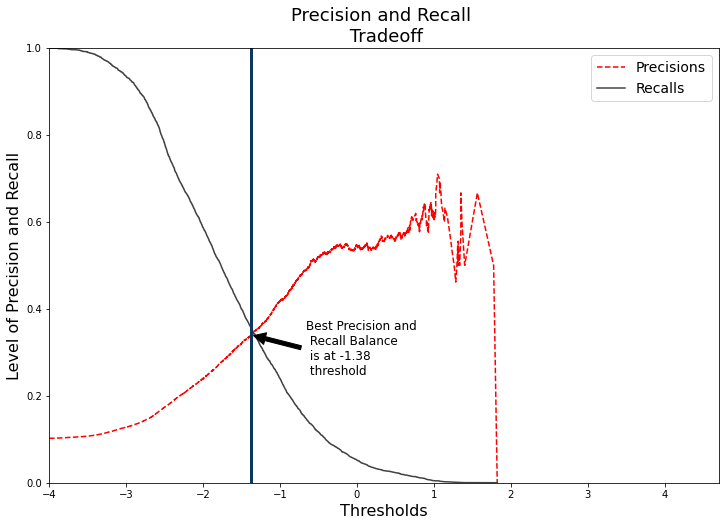

Gradient Boost Classifier AUC Score:  0.7587311270801838
Logistic AUC Score:  0.5115264852257455
Random Forest AUC Score:  0.6874845351250234
Catboost AUC Score:  0.7542879410069033


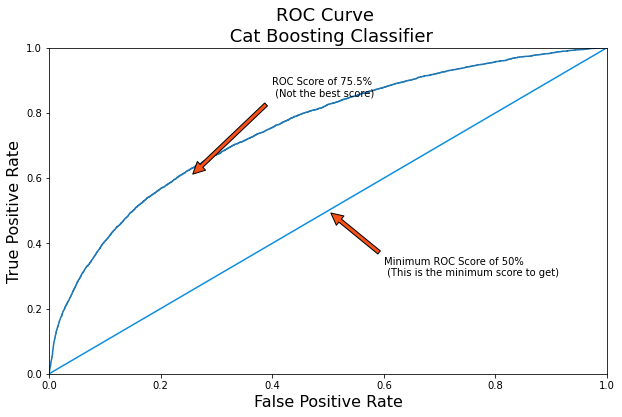

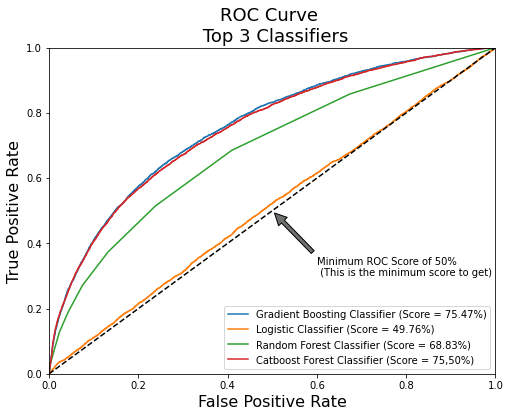

In [78]:


# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)


def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-4, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=-1.38, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at -1.38 \n threshold ', xy=(-1.38, 0.34), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()


from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, logistic_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, rand_y_scores)
cat_fpr, cat_tpr, cat_threshold = roc_curve(y_train, cat_scores)


from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier AUC Score: ', roc_auc_score(y_train, y_scores))
print('Logistic AUC Score: ', roc_auc_score(y_train, logistic_y_scores))
print('Random Forest AUC Score: ', roc_auc_score(y_train, rand_y_scores))
print('Catboost AUC Score: ', roc_auc_score(y_train, cat_scores))


def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Cat Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 75.5% \n (Not the best score)', xy=(0.25, 0.6), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(cat_fpr, cat_tpr, threshold)
plt.show()


def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr,cat_fpr, cat_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 75.47%)')
    plt.plot(neu_fpr, neu_tpr, label='Logistic Classifier (Score = 49.76%) ')
    plt.plot(nav_fpr, nav_tpr, label='Random Forest Classifier (Score = 68.83%)')
    plt.plot(cat_fpr, cat_tpr, label='Catboost Forest Classifier (Score = 75,50%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr,cat_fpr, cat_tpr)
plt.show()

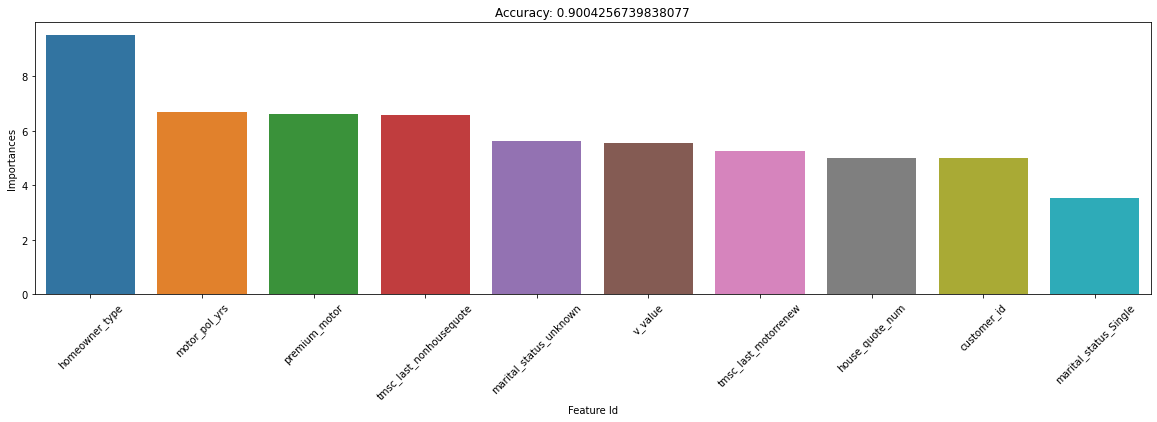

In [79]:
plt.figure(figsize=(20,5))
fi=cb_clf.get_feature_importance(prettified=True).head(10)
sb.barplot(x="Feature Id",y="Importances",data=fi)
plt.xticks(rotation=45)

score=cb_clf.score(X_test,y_test)
plt.title('Accuracy: '+str(score))
plt.show()

## **Fixing class imbalance**

In [80]:


# The classes are heavily skewed we need to solve this issue later.
print('Number of client who said no to term depsits', round(data_copy['received_quote'].value_counts()[0]/len(data_copy) * 100,2), '% of the dataset')
print('Number of client who said yes to term depsits', round(data_copy['received_quote'].value_counts()[1]/len(data_copy) * 100,2), '% of the dataset')



Number of client who said no to term depsits 89.83 % of the dataset
Number of client who said yes to term depsits 10.17 % of the dataset




**Note: Notice how imbalanced is our original dataset! Most of the transactions are non house quotes. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are non house quote. But we don't want our model to assume, we want our model to detect patterns that said yes to house quote!**


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Number of client who said no to term depsits', round(data_copy['received_quote'].value_counts()[0]/len(data_copy) * 100,2), '% of the dataset')
print('Number of client who said yes to term depsits', round(data_copy['received_quote'].value_counts()[1]/len(data_copy) * 100,2), '% of the dataset')

X = data.drop('received_quote', axis=1)
y = data['received_quote']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Number of client who said no to term depsits 89.84 % of the dataset
Number of client who said yes to term depsits 10.16 % of the dataset
Train: [ 9781  9785  9792 ... 59899 59900 59901] Test: [    0     1     2 ... 12364 12365 12366]
Train: [    0     1     2 ... 59899 59900 59901] Test: [ 9781  9785  9792 ... 24495 24496 24497]
Train: [    0     1     2 ... 59899 59900 59901] Test: [19189 19194 19205 ... 36300 36301 36302]
Train: [    0     1     2 ... 59899 59900 59901] Test: [31856 31868 31869 ... 48066 48067 48068]
Train: [    0     1     2 ... 48066 48067 48068] Test: [46733 46735 46739 ... 59899 59900 59901]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.8983974 0.1016026]
[0.89841402 0.10158598]


In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
 
 
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))
 
# List to append the score and then find the average
accuracy_lst = {}
precision_lst = {}
recall_lst = {}
f1_lst = {}
auc_lst = {}
 
# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression(class_weight='balanced')
 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
 
 
 
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
 
 
 
#knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
 
#random_knears = RandomizedSearchCV(KNeighborsClassifier(), knears_params)
 
"""
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
"""
 
 
# Support Vector Classifier
#svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#random_svc = RandomizedSearchCV(SVC(), svc_params)
 
 
"""
grid_svc.fit(X_train, y_train)
 
# SVC best estimator
svc = grid_svc.best_estimator_
"""
 
 
# DecisionTree Classifier
#tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
#             "min_samples_leaf": list(range(5,7,1))}
#random_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
 
"""
grid_tree.fit(X_train, y_train)
 
# tree best estimator
tree_clf = grid_tree.best_estimator_
"""
 
 
# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
 
 
# Random Forest Classifier
#rand_clf = RandomForestClassifier(n_estimators=18,class_weight='balanced')
 
cb_clf = CatBoostClassifier()
 
 
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
 
cls_name = ['LogisticRegression','GradientBoostingClassifier']
classifiers = [rand_log_reg,grad_clf]
 
for i,cl in enumerate(classifiers):
 
    for train, test in sss.split(original_Xtrain, original_ytrain):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), cl) # SMOTE happens during Cross Validation not before..
        model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
        if cl in [grad_clf]:
            prediction = cl.predict(original_Xtrain[test])
        else:
            best_est = cl.best_estimator_
            prediction = best_est.predict(original_Xtrain[test])
            if prediction.ndim == 2:
              prediction = prediction[:, 1]
        accuracy_lst[cl]=pipeline.score(original_Xtrain[test], original_ytrain[test])
        precision_lst[cl]=precision_score(original_ytrain[test], prediction)
        recall_lst[cl]=recall_score(original_ytrain[test], prediction)
        f1_lst[cl]=f1_score(original_ytrain[test], prediction)
        auc_lst[cl]=roc_auc_score(original_ytrain[test], prediction)
        
    print('---' * 45)
    print('Metric Report  for',cls_name[i])
    print()
    print("accuracy: {}".format(np.mean(accuracy_lst[cl])))
    print("precision: {}".format(np.mean(precision_lst[cl])))
    print("recall: {}".format(np.mean(recall_lst[cl])))
    print("f1: {}".format(np.mean(f1_lst[cl])))
    print('---' * 45)

Length of X (train): 47922 | Length of y (train): 47922
Length of X (test): 11980 | Length of y (test): 11980
---------------------------------------------------------------------------------------------------------------------------------------
Metric Report  for LogisticRegression

accuracy: 0.8367070116861436
precision: 0.15916955017301038
recall: 0.14168377823408623
f1: 0.1499185225420967
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
Metric Report  for GradientBoostingClassifier

accuracy: 0.8993113522537562
precision: 0.5445544554455446
recall: 0.05646817248459959
f1: 0.10232558139534884
---------------------------------------------------------------------------------------------------------------------------------------


In [83]:
original_ytest

array([1, 1, 1, ..., 0, 0, 1])

Checking results on test set for 4 classifiers (logistic,Gradient Boosting)

---------------------------------------------------------------------------------------------------------------------------------------
Metric Report  for LogisticRegressionon Test data

              precision    recall  f1-score   support

          no       0.90      1.00      0.95     10763
         yes       0.65      0.06      0.11      1217

    accuracy                           0.90     11980
   macro avg       0.77      0.53      0.53     11980
weighted avg       0.88      0.90      0.86     11980


---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------

Average precision-recall score for LogisticRegression
Average precision-recall score: 0.12

------------------------------------------------------------------------------------------------------------------------

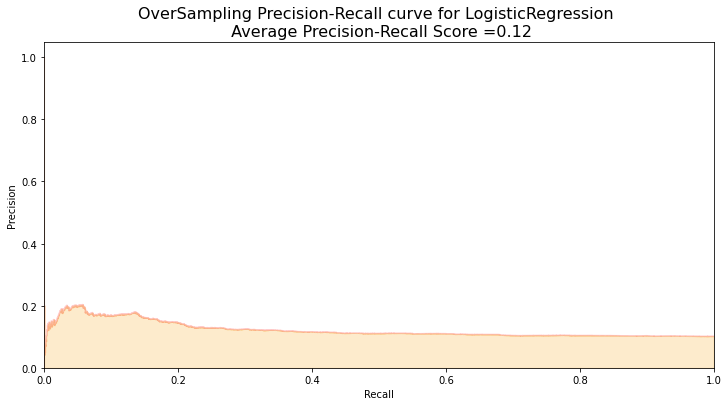

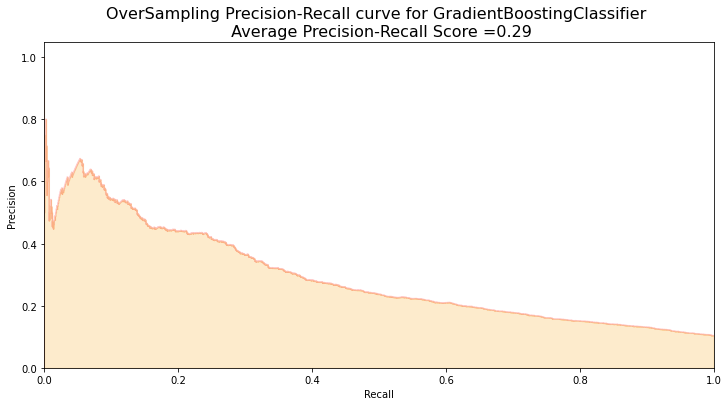

In [86]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

labels = ['no', 'yes']
classifiers_ = [rand_log_reg,grad_clf]
cls_name_ = ['LogisticRegression','GradientBoostingClassifier']


for i,c1 in enumerate(classifiers_):
    original_ytest= np.where(original_ytest==0, 'no', original_ytest) 
    original_ytest= np.where(original_ytest=='1', 'yes', original_ytest) 
 
    print('---' * 45)
    print('Metric Report  for',cls_name_[i]+"on Test data")
    print()
    
    if (cl in [rand_log_reg]):
      smote_prediction = c1.best_estimator_.predict(original_Xtest)
    else:
      smote_prediction = cl.predict(original_Xtest)

    smote_prediction= np.where(smote_prediction==0, 'no', smote_prediction) 
    smote_prediction= np.where(smote_prediction=='1', 'yes', smote_prediction)
    print(classification_report(original_ytest, smote_prediction, target_names=labels))
    print()
    print('---' * 45)
    print('---' * 45)
    print()
    original_ytest= np.where(original_ytest=='no', 0, original_ytest) 
    original_ytest= np.where(original_ytest=='yes', 1, original_ytest) 

    if (cl in [rand_log_reg]):
      y_score = c1.best_estimator_.decision_function(original_Xtest)    
    else:
      y_score = c1.decision_function(original_Xtest)

                
          
    print('Average precision-recall score for '+cls_name_[i])
    original_ytest= original_ytest.astype(int)
    average_precision = average_precision_score(original_ytest, y_score)
          
    print('Average precision-recall score: {0:0.2f}'.format(
                average_precision))
    print()
          

    print('---' * 45)
    print()
    print('OverSampling Precision-Recall curve: '+cls_name_[i]+" on Test data")
    fig = plt.figure(figsize=(12,6))

    precision, recall, _ = precision_recall_curve(original_ytest, y_score)

    plt.step(recall, precision, color='r', alpha=0.2,
              where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                      color='#F59B00')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('OverSampling Precision-Recall curve for '+cls_name_[i]+' \n Average Precision-Recall Score ={0:0.2f}'.format(
                    average_precision), fontsize=16)

# SMOTE Technique (OverSampling) After splitting and Cross Validating


In [91]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)

# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

Before Smote

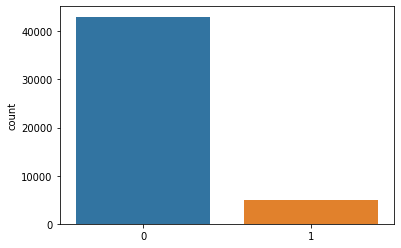

In [92]:
sb.countplot(original_ytrain)

After Smote

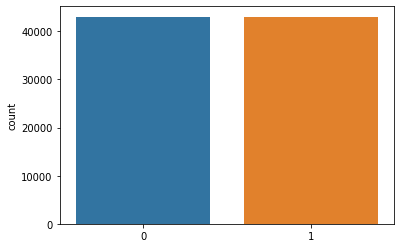

In [93]:
sb.countplot(ysm_train)

In [95]:
import time

# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

cls_name = ['LogisticRegression','GradientBoostingClassifier']
classifiers = [rand_log_reg,grad_clf]
a={}
for i,cl in enumerate(classifiers):
  print('---' * 45)
  print(cls_name[i])
  t0 = time.time()
  if (cl in [rand_log_reg]):
        a[i]=cl.best_estimator_
        a[i].fit(Xsm_train, ysm_train)
  else:
          a[i]=cl.fit(Xsm_train, ysm_train)
  t1 = time.time()
  #print(log_reg[i])
  print("Fitting oversample data took :{} sec".format(t1 - t0)+str()+" for "+cls_name[i])


---------------------------------------------------------------------------------------------------------------------------------------
LogisticRegression
Fitting oversample data took :0.702315092086792 sec for LogisticRegression
---------------------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier
Fitting oversample data took :96.56572723388672 sec for GradientBoostingClassifier


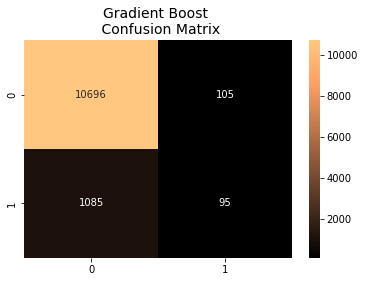

In [97]:
y_pred_grad = a[1].predict(X_test)
grad_cf = confusion_matrix(y_test, y_pred_grad)
sb.heatmap(grad_cf, annot=True, cmap=plt.cm.copper,fmt='g')
plt.title("Gradient Boost \n Confusion Matrix", fontsize=14)
plt.show()

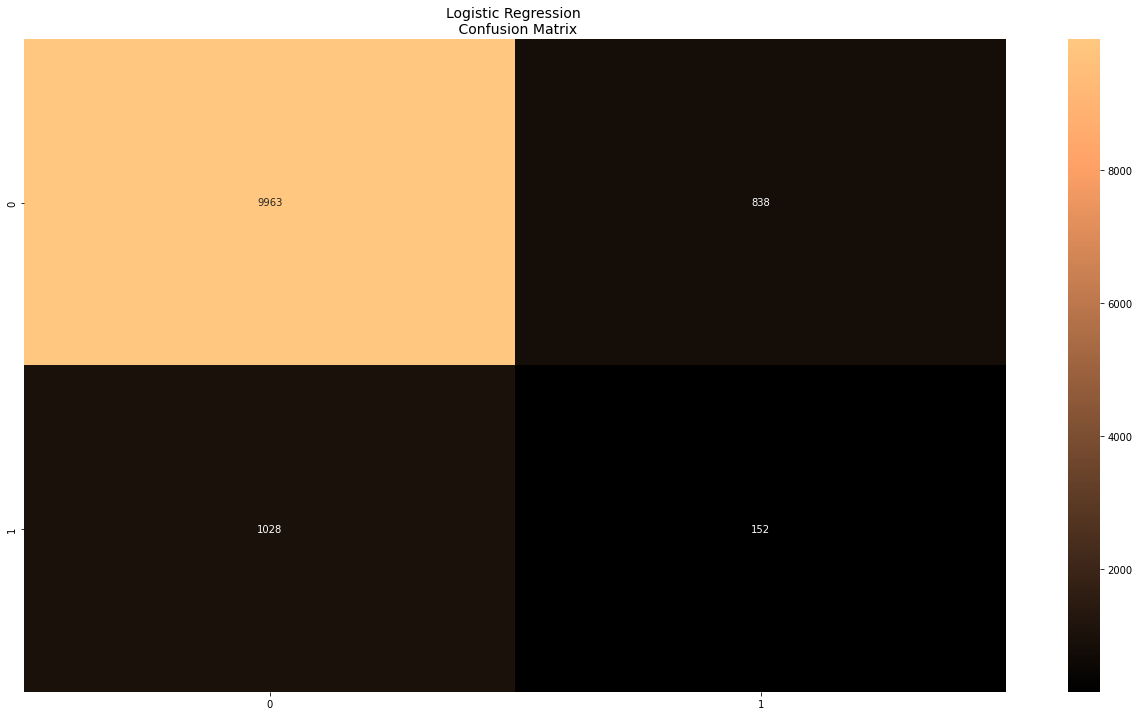

In [103]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = a[0].predict(X_test)


# Other models fitted with SMOTE
y_pred_grad = a[1].predict(X_test)




log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)


fig, ax = plt.subplots(1, 1,figsize=(22,12))


sb.heatmap(log_reg_cf, ax=ax, annot=True, cmap=plt.cm.copper,fmt='g')
ax.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)




plt.show()

In [104]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))
precision, recall, threshold = precision_recall_curve(original_ytest, y_score)
print("Precision score "+str(precision.mean()))
print()
print("Recall score "+str(recall.mean()))
print()
print("Average score"+str(average_precision_score(original_ytest, y_score)))
print()
print()


print('Gradient Boosting Classifier:')
print(classification_report(y_test, y_pred_grad))
precision, recall, threshold = precision_recall_curve(y_test, y_pred_grad)
print("Precision score "+str(precision.mean()))
print()
print("Recall score "+str(recall.mean()))
print()
print("Average score"+str(average_precision_score(y_test, y_pred_grad)))
print()
print()

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     10801
           1       0.15      0.13      0.14      1180

    accuracy                           0.84     11981
   macro avg       0.53      0.53      0.53     11981
weighted avg       0.83      0.84      0.84     11981

Precision score 0.19676050695827765

Recall score 0.7031097880133733

Average score0.29121021936422786


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10801
           1       0.47      0.08      0.14      1180

    accuracy                           0.90     11981
   macro avg       0.69      0.54      0.54     11981
weighted avg       0.87      0.90      0.87     11981

Precision score 0.5244964248949726

Recall score 0.3601694915254237

Average score0.1288015788416405




# Future Improvements:

1). Ensembling of Random forest, gradient boosting, and logistic can give improved results.

2). Recall can be further improved, by using calibrated classifers by changing prediction probability thresholds.

3). We can use classfier with bootstrap class weights.

4). Further different feature can be engineered to further improve true positives.
